## Contents<a id='2.1_Contents'></a>
  * [2.1 Introduction](#2.1_Contents)
  * [2.2 Problem Statement](#2.2_Problem_statement)
  * [2.3 Data Wrangling](#2.3)
      * [2.3.1 File Imports](#2.3.1)
      * [2.3.2 Explore Data](#2.3.2)
      * [2.3.3 Data Cleansing](#2.3.3)
      * [2.3.4 Data Wrangling Summary](#2.3.4)
  * [2.4 Exploratory Data Analysis](#2.4)
      * [2.4.1  Visualizing pairplot and probability distributions of numerical features](#2.4.1)
      * [2.4.2 Summary Statistics](#2.4.2)
      * [2.4.3 Visualizing Distributions](#2.4.3)
      * [2.4.4 Exploratory Data Analysis Summary](#2.4.4)
  * [2.5 Feature Selection based on Correlation](#2.5)

## 2.1 Introduction<a id='2.1_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

## 2.2 Problem Statement<a id='2.2_Problem_statement'></a>

JB link telco company is encountering a problem of a high 27% customer loss leading to a 12% drop in our customer numbers. And urgently need to forecast which customers are prone to churn and recommend tailored strategies to retain customers.

## 2.3 Data Wrangling<a id='2.3'></a>

### 2.3.1 File Imports<a id='2.3.1'></a>

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [142]:
pwd

'C:\\Users\\Aditi\\OneDrive\\Documents\\GitHub\\Springboard-Data-Science\\Capstone 2 Telcom Customer Churn\\Python Files'

In [143]:
df=pd.read_csv('telco_churn_data.csv')

In [144]:
df.head()

Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0     None            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  ...   Latitude   Longitude Population  \
0              Yes   Fiber Optic  ...  34.023810 -118.156582      68701   
1              Yes         Cable  ...  34.044271 -118.185237      55668   
2              Yes   Fiber Optic  ...  34.108833 -118.229715      47534   
3              Yes   Fiber Optic  ...  33.936291 -118.332639      27778   
4              Yes         Cable  ...  33.972119 -118.020188      26265   

  Churn Value  CLTV   Churn Category                  Churn Reason  \
0           1  5433       Competitor  Competitor offered more data   
1           1  5302       Competitor  Competitor made better offer   
2           1  3179       Competitor  Competitor made better offer   
3           1  5337  Dissatisfaction     Limited range of services   
4           1  2793            Price            Extra data charges   

  Total Customer Svc Requests Product/Service Issues Reported  \
0                           5                               0   
1                           5                               0   
2                           1                               0   
3                           1                               1   
4                           1                               0   

  Customer Satisfaction  
0                   NaN  
1                   NaN  
2                   NaN  
3                   2.0  
4                   2.0  

[5 rows x 46 columns]

### 2.3.2 Explore Data<a id='2.3.2'></a>

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [146]:
df.shape

(7043, 46)

Number Of Missing Values By Column

In [147]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

count          %
Customer Satisfaction               5209  73.959960
Churn Reason                        5174  73.463013
Churn Category                      5174  73.463013
Number of Dependents                   0   0.000000
Total Extra Data Charges               0   0.000000
Total Long Distance Charges            0   0.000000
Gender                                 0   0.000000
Age                                    0   0.000000
Under 30                               0   0.000000
Senior Citizen                         0   0.000000
Married                                0   0.000000
Dependents                             0   0.000000
Zip Code                               0   0.000000
City                                   0   0.000000
Referred a Friend                      0   0.000000
Latitude                               0   0.000000
Longitude                              0   0.000000
Population                             0   0.000000
Churn Value                            0   0.000000
CLTV                                   0   0.000000
Total Customer Svc Requests            0   0.000000
Product/Service Issues Reported        0   0.000000
Total Refunds                          0   0.000000
Customer ID                            0   0.000000
Monthly Charge                         0   0.000000
Payment Method                         0   0.000000
Number of Referrals                    0   0.000000
Tenure in Months                       0   0.000000
Offer                                  0   0.000000
Phone Service                          0   0.000000
Avg Monthly Long Distance Charges      0   0.000000
Multiple Lines                         0   0.000000
Internet Service                       0   0.000000
Internet Type                          0   0.000000
Avg Monthly GB Download                0   0.000000
Online Security                        0   0.000000
Online Backup                          0   0.000000
Device Protection Plan                 0   0.000000
Premium Tech Support                   0   0.000000
Streaming TV                           0   0.000000
Streaming Movies                       0   0.000000
Streaming Music                        0   0.000000
Unlimited Data                         0   0.000000
Contract                               0   0.000000
Paperless Billing                      0   0.000000
Total Regular Charges                  0   0.000000

In [148]:
print("\nStatistical summary of the DataFrame:")
print(df.describe())


Statistical summary of the DataFrame:
       Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000     

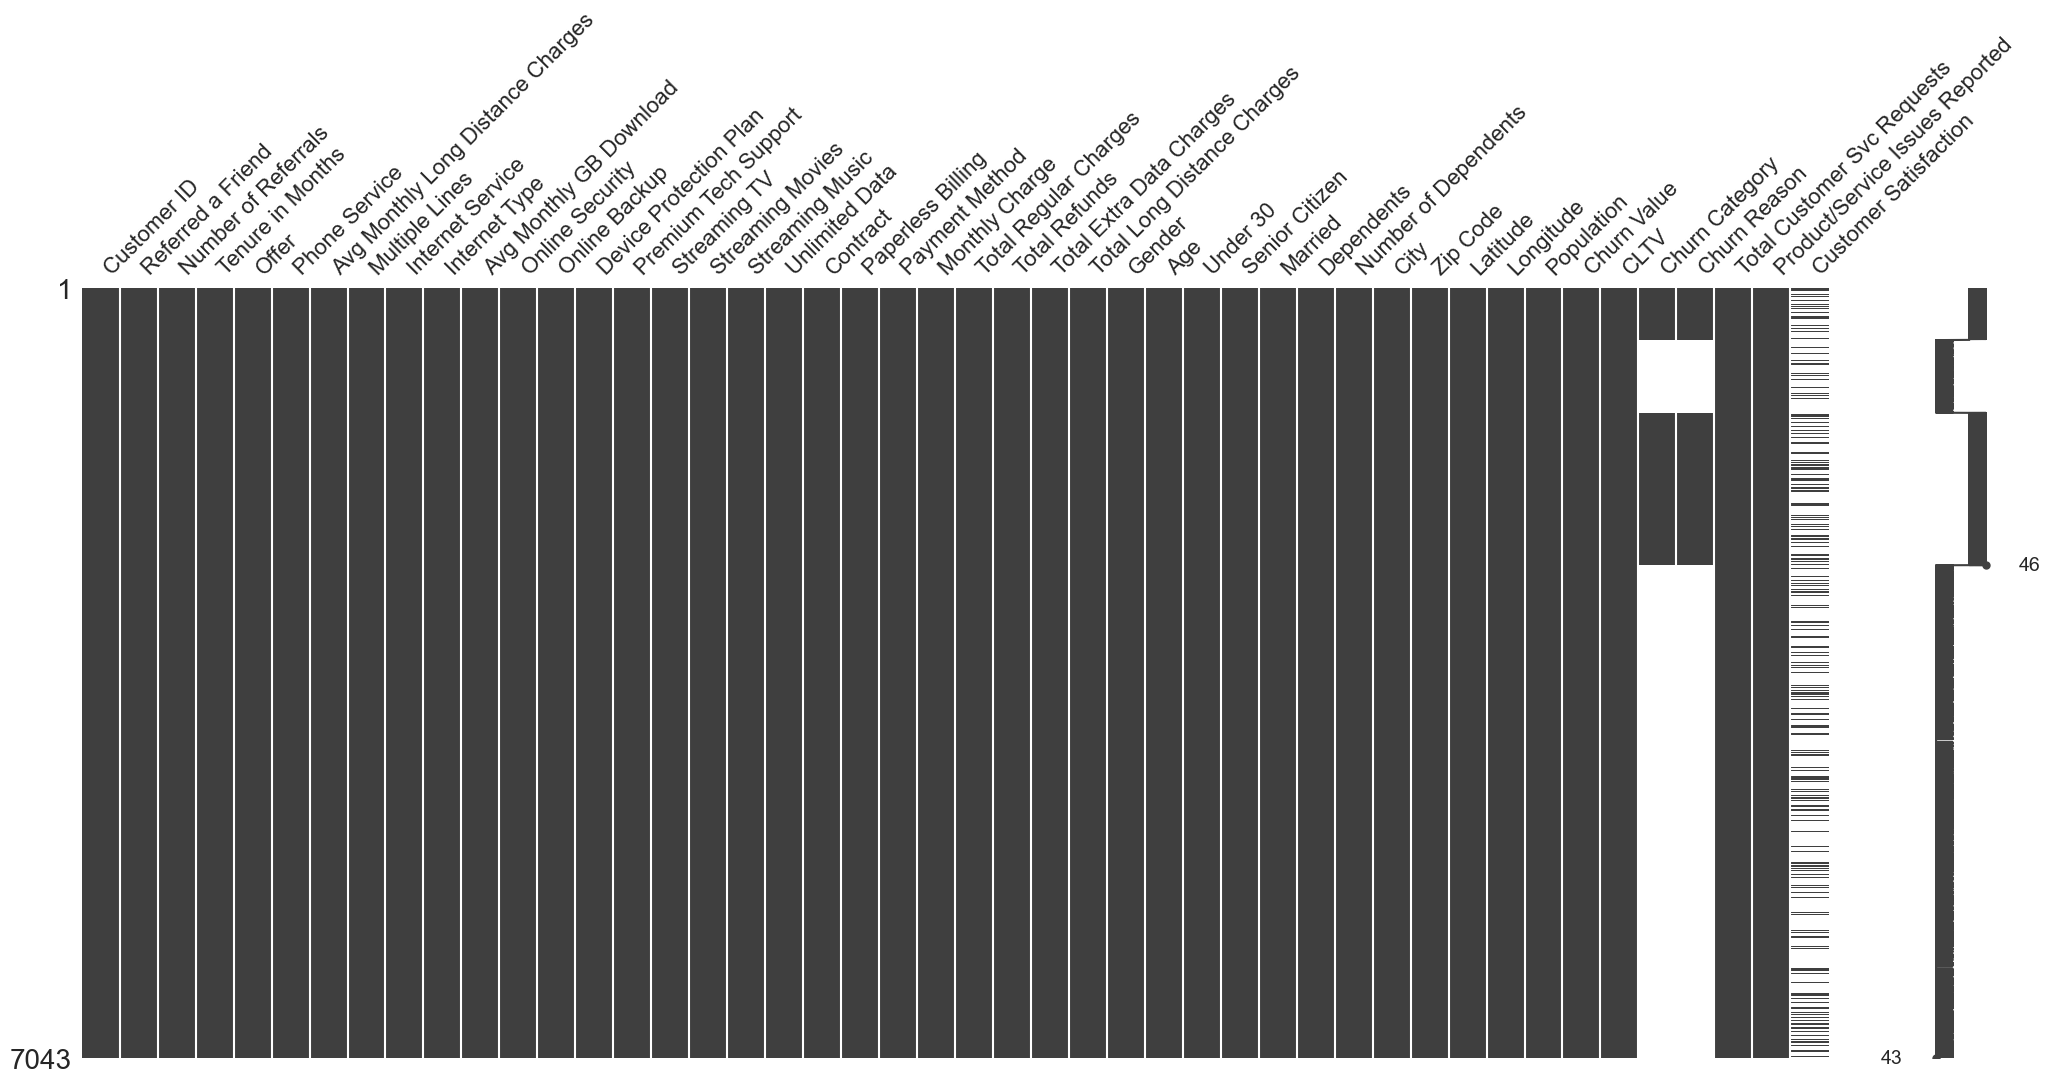

In [149]:
# Visualize missing values as a matrix
msno.matrix(df);

### 2.3.3 Data Cleansing<a id='2.3.3'></a>

In [150]:
#Count of null values per column
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [151]:
# Count of unique values per column
print(df.nunique())

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2298
Total Regular Charges             

In [152]:
# List of columns to convert from yes and no values to 1 and 0
yes_no_columns = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
                  'Online Security', 'Online Backup', 'Device Protection Plan',
                  'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
                  'Unlimited Data', 'Under 30', 'Senior Citizen', 'Married', 'Dependents']

# Convert 'Yes' and 'No' to 1 and 0
for column in yes_no_columns:
    df[column] = df[column].replace({'Yes': 1, 'No': 0})

# Display the updated DataFrame
print(df.head())

  Customer ID  Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                  0                    0                 1   
1  7495-OOKFY                  1                    1                 8   
2  1658-BYGOY                  0                    0                18   
3  4598-XLKNJ                  1                    1                25   
4  4846-WHAFZ                  1                    1                37   

     Offer  Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  \
0     None              0                               0.00               0   
1  Offer E              1                              48.85               1   
2  Offer D              1                              11.33               1   
3  Offer C              1                              19.76               0   
4  Offer C              1                               6.33               1   

   Internet Service Internet Type  ...   Latitude   Longitude  Popul

In [153]:
# Remove unnecessary columns
columns_to_remove = [
    'Customer ID', 'City','Age', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Referred a Friend', 'Tenure in Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming Music', 'Streaming Movies', 'Streaming TV', 'Unlimited Data','Total Long Distance Charges',
    'Under 30', 'Senior Citizen', 'Married', 'Dependents'
    
]
df_cleaned = df.drop(columns=columns_to_remove)

# keeping 'Churn Category', 'Churn Reason', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Customer Satisfaction' at this point to see the top reasons and category for churn.

### 2.3.4 Data Wrangling Summary<a id='2.3.4'></a>

In this step:
1) Imported data into a dataframe
2) Explored data columns using head(), info(), shape, counting and visualizing missing values.
3) Cleansed data after we counted null values and unique values per column. Also converted the 'Yes' 'No' values columns to 1 and 0 so that these can be included as numeric features for statistical analysis in next step.
4) In end removed the unnecessary columns.

## 2.4 Exploratory Data Analysis<a id='2.4'></a>

### 2.4.1 Visualizing pairplot and probability distributions of numerical features<a id='2.4.1'></a>

In [154]:
#Fixing error RuntimeError: In FT2Font: Can not load face (invalid stream operation; error code 0x55) <Figure size 640x480 with 1 Axes>
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

<Figure size 1200x800 with 0 Axes>

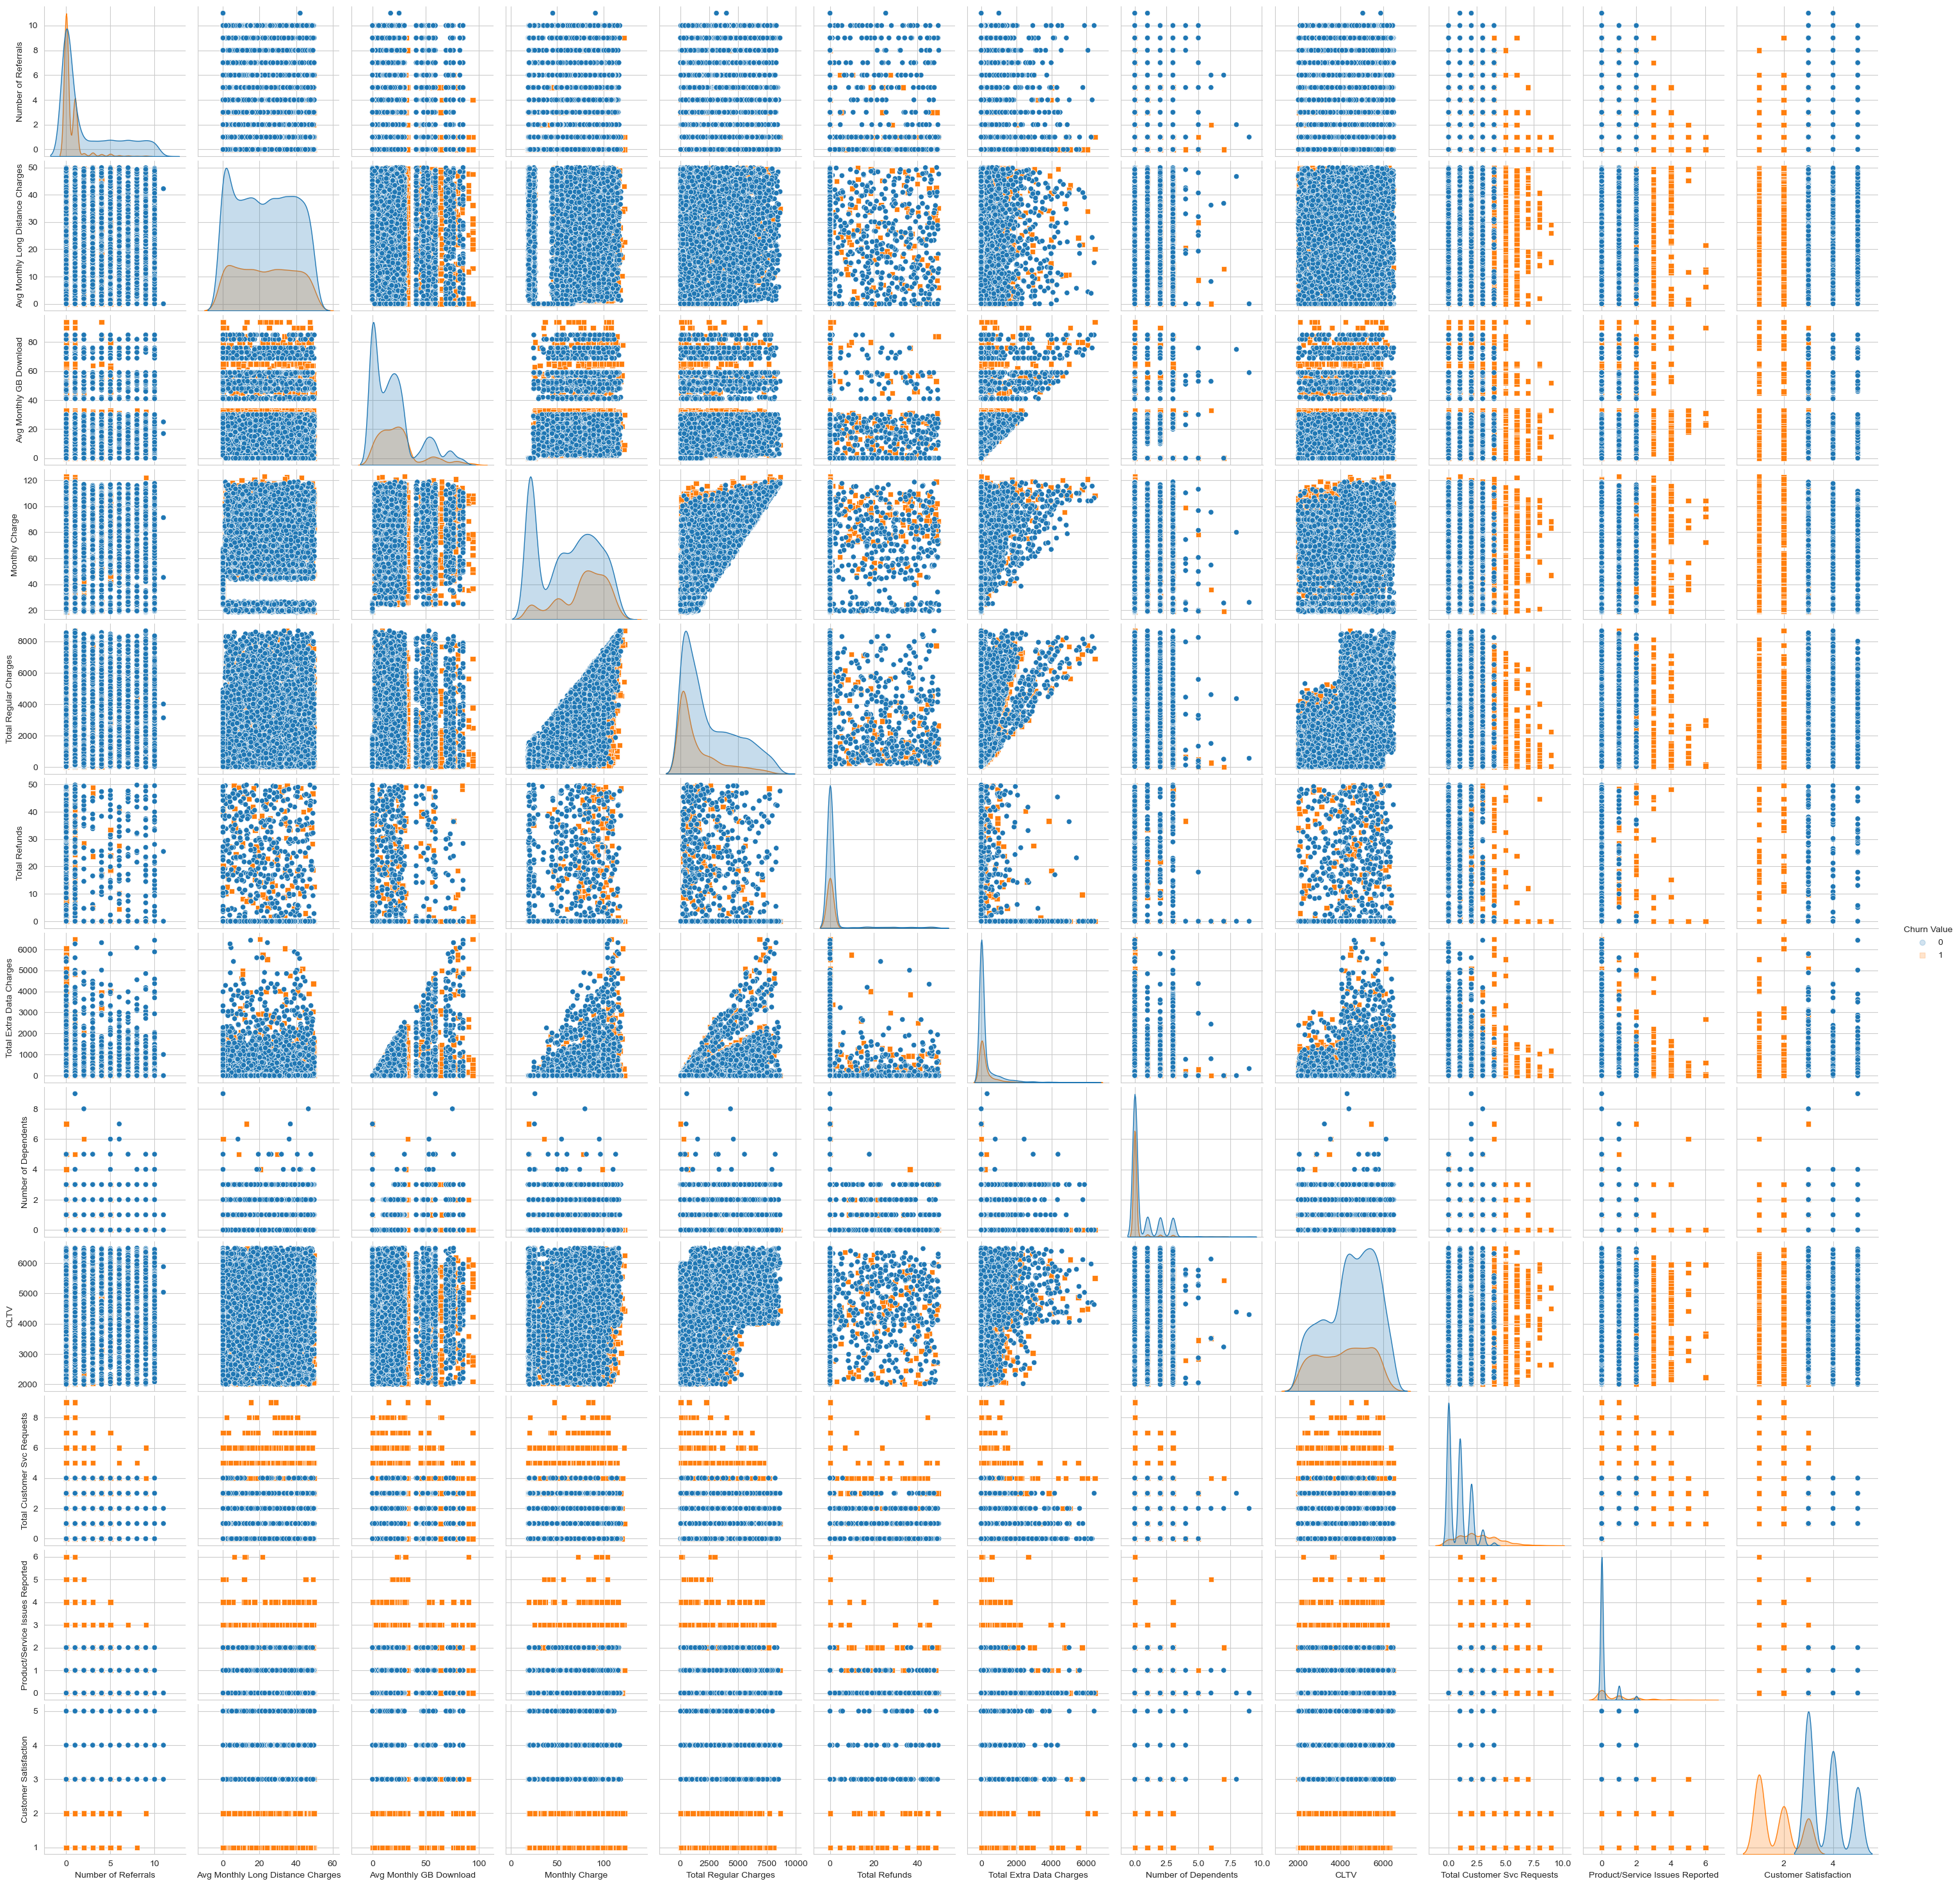

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create pair plot
pairplot = sns.pairplot(df_cleaned, hue='Churn Value', diag_kind='kde', palette='tab10', markers=["o", "s"])

# Adjust transparency for legend labels
for legend_handle in pairplot._legend.legendHandles:
    legend_handle.set_alpha(0.2)

plt.show()


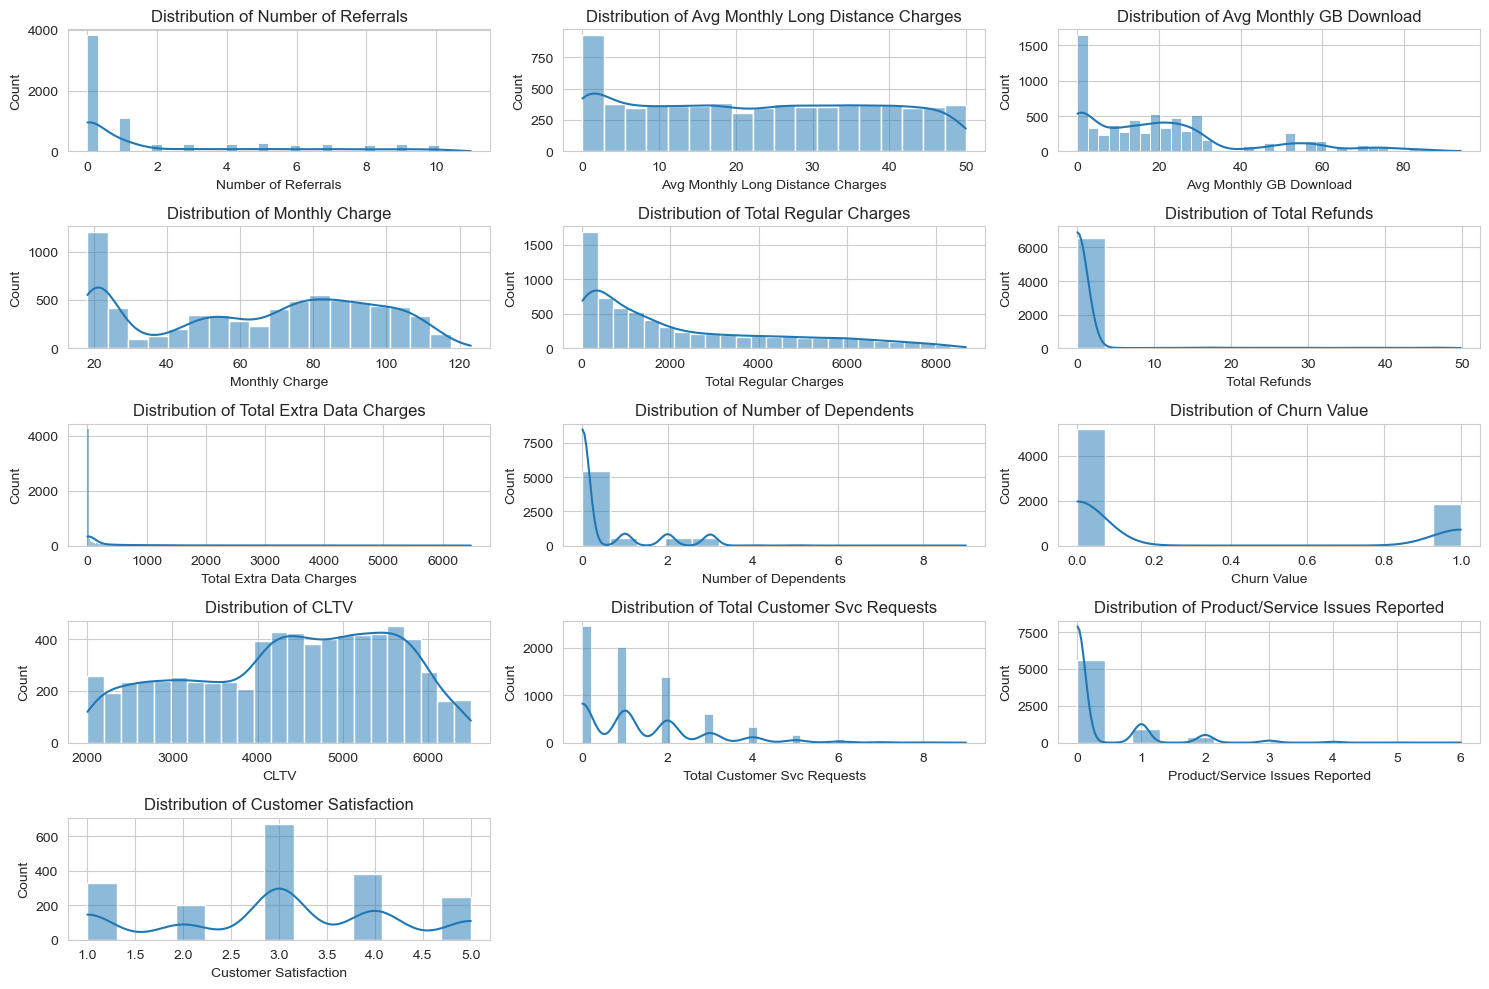

In [156]:
# Visualizing probability distributions of numerical features
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_features)
num_rows = (num_cols - 1) // 3 + 1

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



### 2.4.2 Summary Statistics<a id='2.4.2'></a>

In [157]:
#Summary Statistics:
# Display summary statistics for numerical features
summary_stats = df_cleaned.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Number of Referrals  Avg Monthly Long Distance Charges  \
count          7043.000000                        7043.000000   
mean              1.951867                          22.958954   
std               3.001199                          15.448113   
min               0.000000                           0.000000   
25%               0.000000                           9.210000   
50%               0.000000                          22.890000   
75%               3.000000                          36.395000   
max              11.000000                          49.990000   

       Avg Monthly GB Download  Monthly Charge  Total Regular Charges  \
count              7043.000000     7043.000000            7043.000000   
mean                 21.110890       65.538800            2280.381264   
std                  20.948471       30.606805            2266.220462   
min                   0.000000       18.250000              18.800000   
25%                   3.00000

### 2.4.3 Visualizing Distributions<a id='2.4.3'></a>

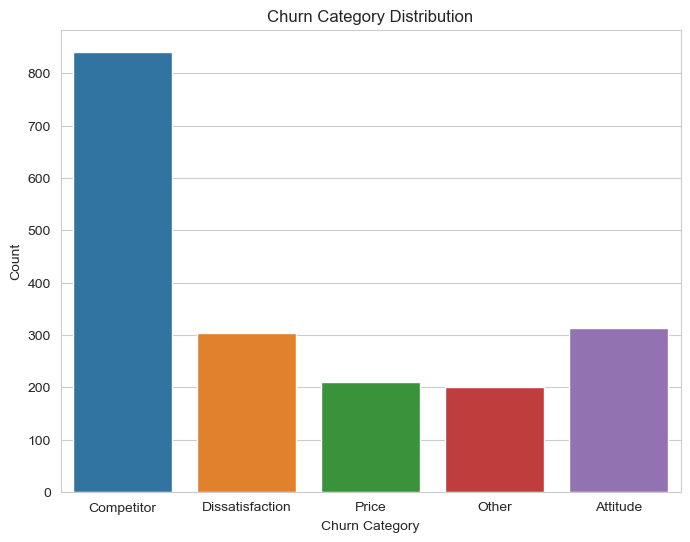

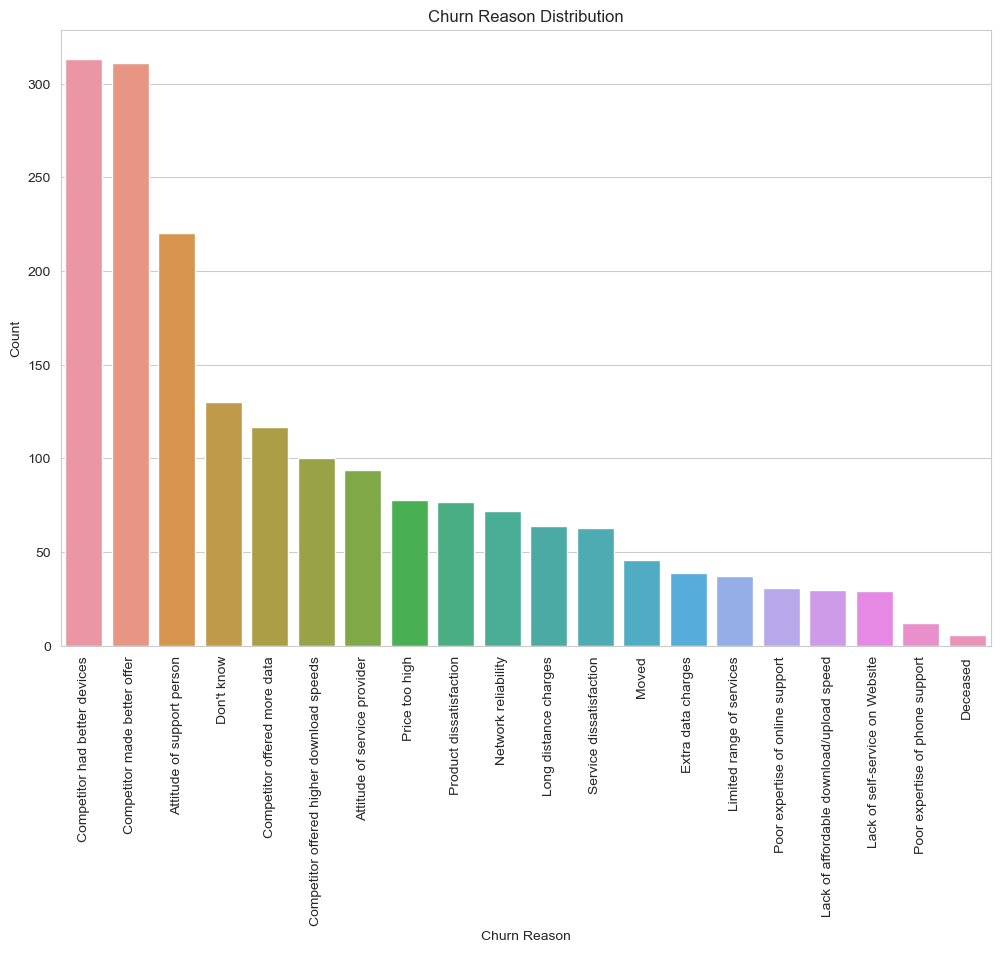

In [158]:
# Data Visualization:
# Visualize 'Churn Category' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Category', data=df_cleaned)
plt.title('Churn Category Distribution')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

# Visualize 'Churn Reason' distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Churn Reason', data=df, order=df_cleaned['Churn Reason'].value_counts().index)
plt.title('Churn Reason Distribution')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [159]:
# Remove unnecessary columns
columns_to_remove = [
    'Churn Category', 'Churn Reason'
    
]
df1 = df_cleaned.drop(columns=columns_to_remove)

# keeping 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Customer Satisfaction' for feature selection.

### 2.4.4 Exploratory Data Analysis Summary<a id='2.4.4'></a>


In this step:
1) Analysed the columns by looking at the pair plot to find columns of interests and found below columns those have good mix of both churned and non churned customers - Number of Referrals, Avg Monthly GB Download, Avg Monthly Long Distance Charges, Total Refunds, Total Extra Data Charges, Number of Dependent, Total Customer Svc Requests, Customer Satisfaction
2) Analysed the distribution of values and statistical values like min, max, mean, std, 25,50,75th percentiles.
3) Also looked at the churn category and reasons, these columns are not always filled but top two reasons mentioned for churn here are better competitor offer(device, more data, better coverage/speed) and customer service provided to individuals where customers were unhappy with the service provider(person whom they talked on phone or worked by logging a ticket). 
                                      Futher analysis of both these reasons are out of scope for our churn prediction because competitor offer needs an analysis of market analysis of competitor offers and customer service needs further analysis of data on how customer service is solving cutomer issues like how much time it takes to respond, to solve and what are their blockers. For these reasons, removing the columns Churn category, and Churn Reason.
                                     We will use other features to predict the churn for this project and in next step we will use correlation matrix to select the features.

## 2.5 Feature Selection based on Correlation<a id='2.5'></a>

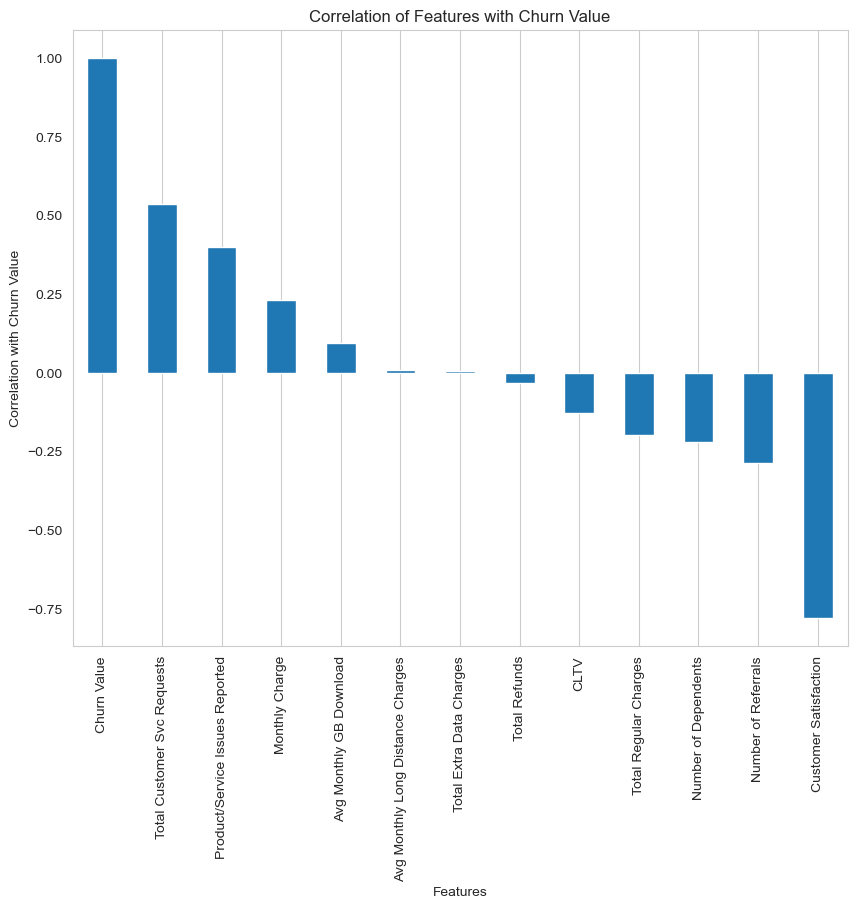

In [160]:
# Feature Selection based on Correlation:
# Compute the correlation matrix
correlation_matrix = df1.corr(numeric_only=True)

# Extract correlation values with target variable
target_correlation = correlation_matrix['Churn Value']

# Set a threshold for minimum correlation
correlation_threshold = 0.1

# Find columns with correlation below the threshold
low_correlation_columns = target_correlation[abs(target_correlation) < correlation_threshold].index

# Drop the columns with low correlation
X_selected = df1.drop(columns=low_correlation_columns)

# Visualize the correlation coefficients with the target variable using a bar graph
plt.figure(figsize=(10, 8))
target_correlation.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Correlation with Churn Value')
plt.xlabel('Features')
plt.title('Correlation of Features with Churn Value')
plt.grid(axis='y')
plt.show()


In [161]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number of Referrals              7043 non-null   int64  
 1   Offer                            7043 non-null   object 
 2   Internet Type                    7043 non-null   object 
 3   Contract                         7043 non-null   object 
 4   Paperless Billing                7043 non-null   object 
 5   Payment Method                   7043 non-null   object 
 6   Monthly Charge                   7043 non-null   float64
 7   Total Regular Charges            7043 non-null   float64
 8   Gender                           7043 non-null   object 
 9   Number of Dependents             7043 non-null   int64  
 10  Churn Value                      7043 non-null   int64  
 11  CLTV                             7043 non-null   int64  
 12  Total Customer Svc R

<Figure size 1200x800 with 0 Axes>

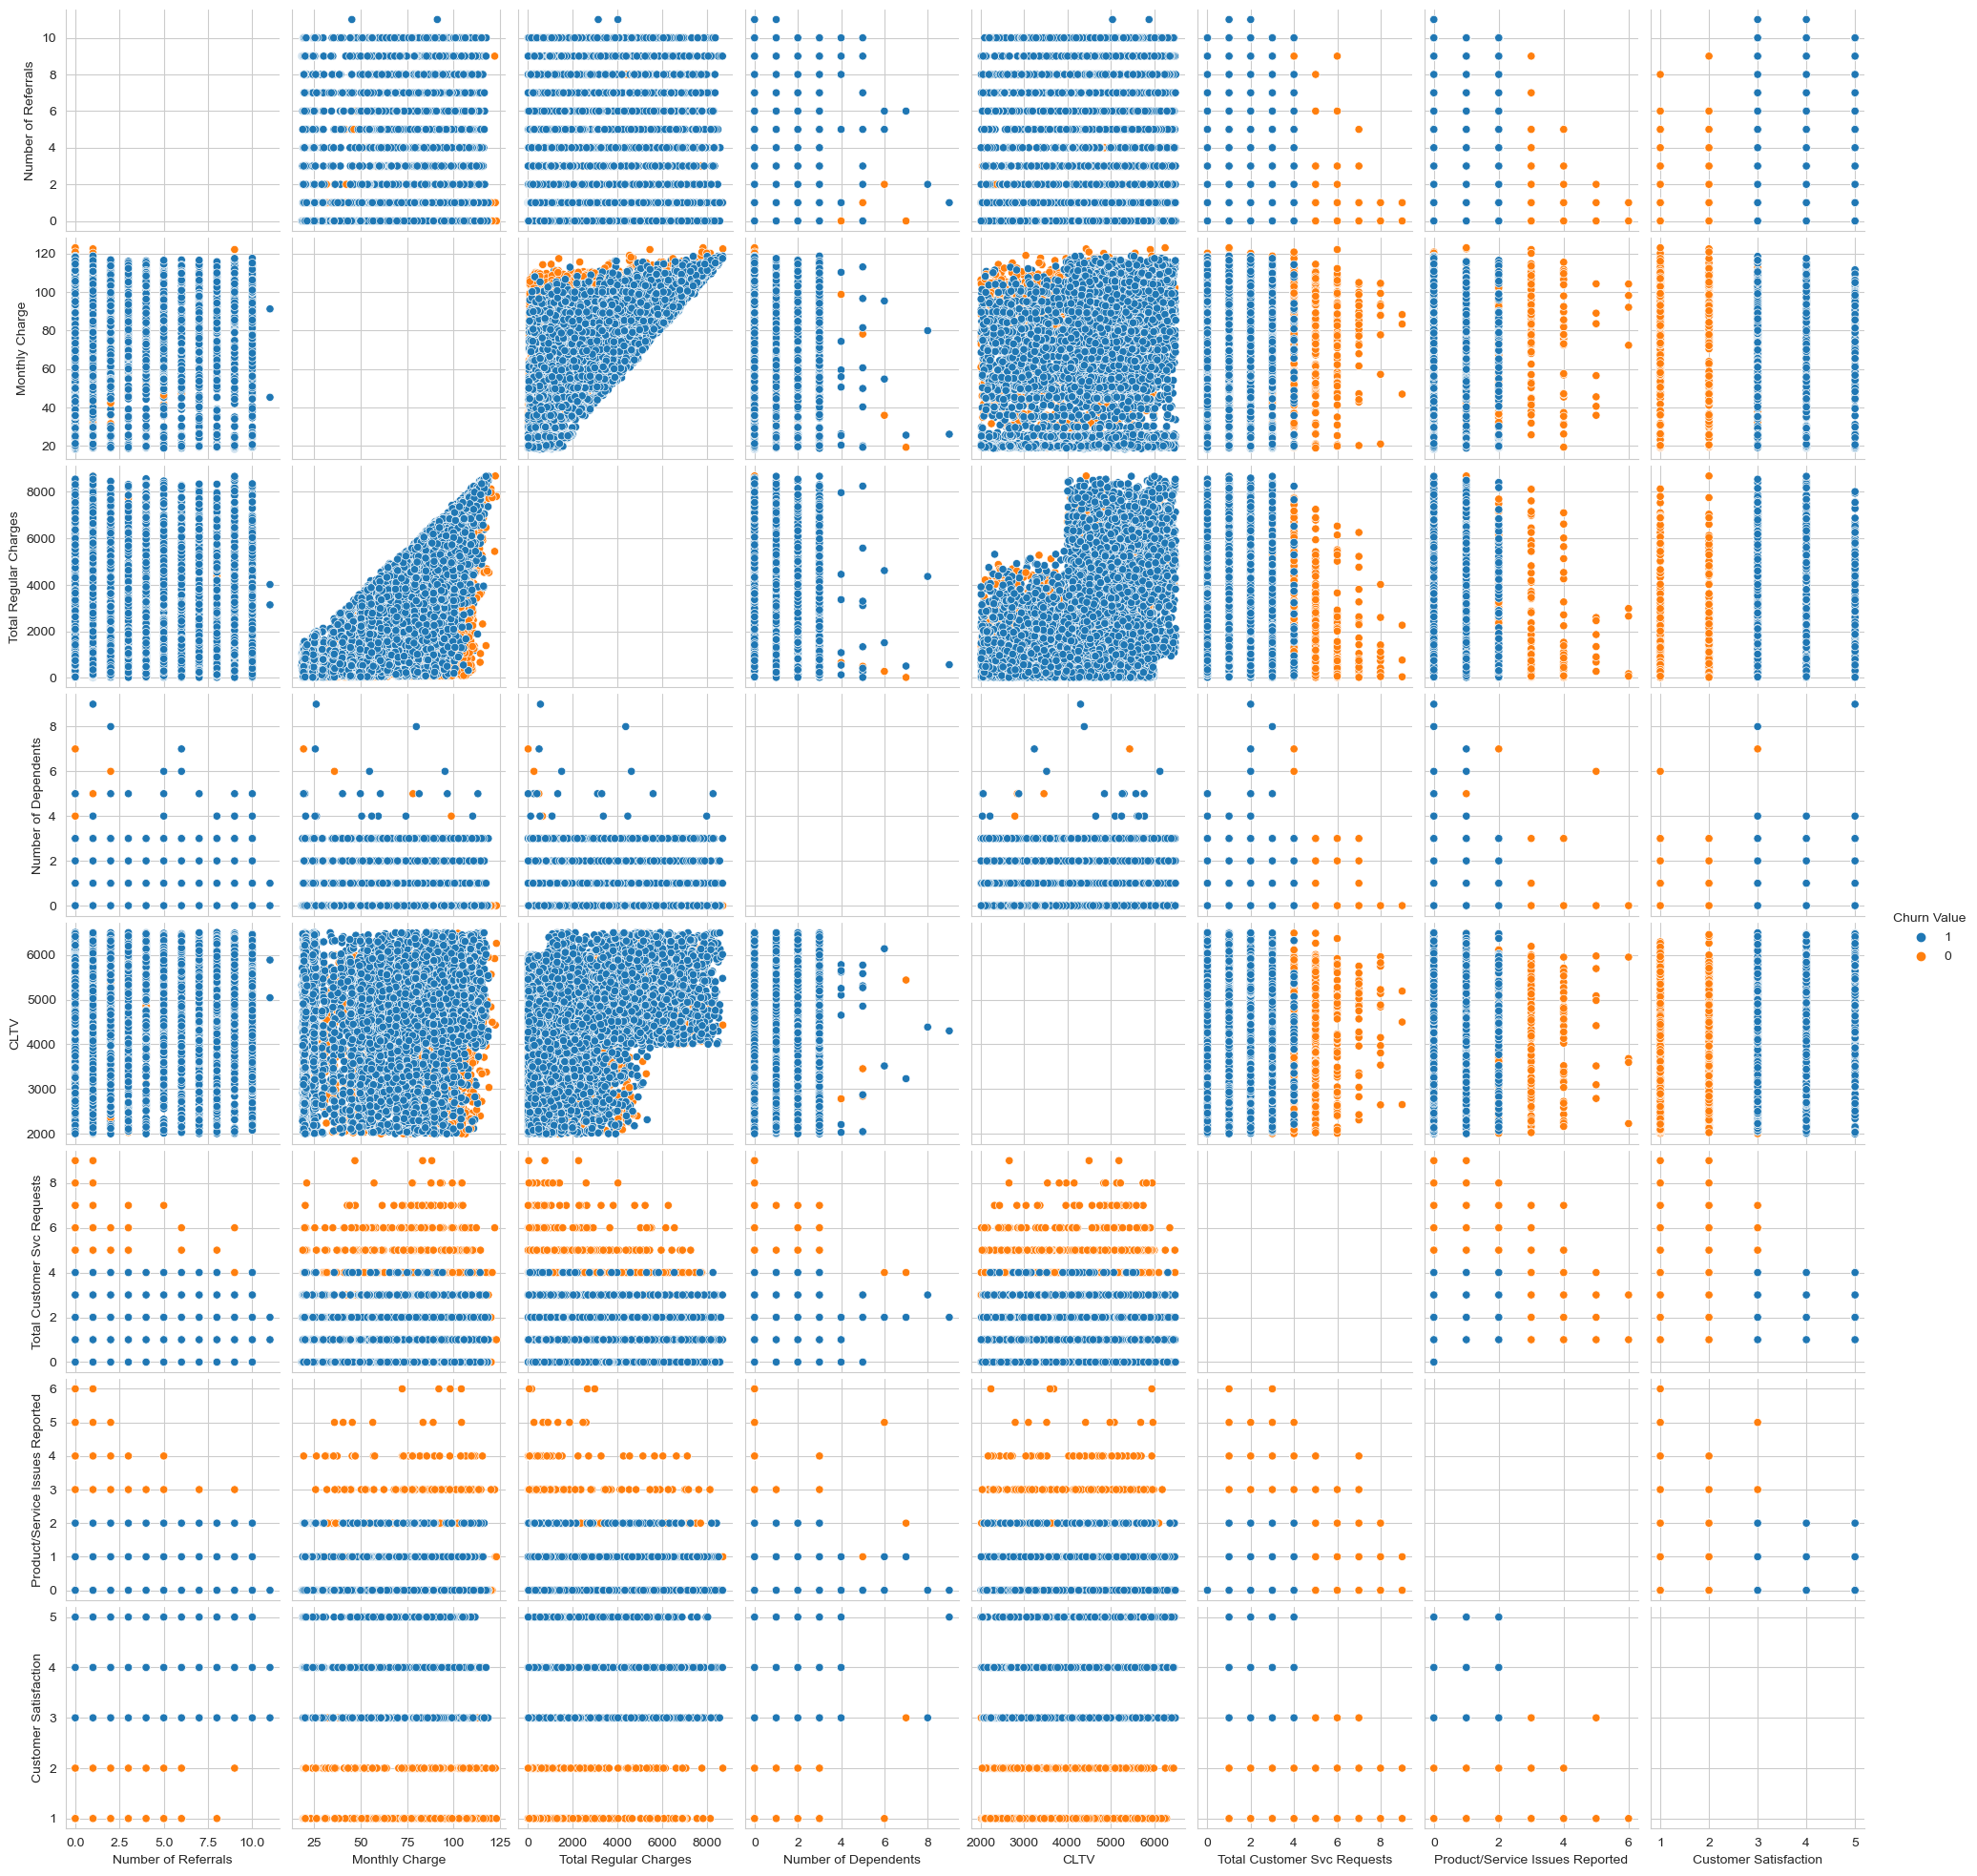

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create pair plot with bar plots
pairplot = sns.pairplot(X_selected, hue='Churn Value', diag_kind='bar', plot_kws={'color': 'skyblue'})

# Get legend labels from the axes
legend_labels = pairplot._legend.texts

# Adjust legend labels
for lbl, value in zip(legend_labels, X_selected['Churn Value'].unique()):
    lbl.set_text(1 if value else 0)  # Set legend labels based on Churn Value

# Set legend title
pairplot._legend.set_title('Churn Value')

plt.show()


In [163]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X_selected)